In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
filename = 'Yi_No_Data_April4_UnicodeProblem.csv'
df = pd.read_csv (filename)
df.shape, df.head()

((33432, 11),
   author  class_gram class_type  class code  pos_x  pos_y  size  confidence  \
 0     yi           0        num      1    0    148   1886    15       77.12   
 1     yi           0        num      1    0   1194   1890    15        0.71   
 2     yi           0        num      1    0   1176   1889    15        0.83   
 3     yi           0        num      1    0   1180   1885    14       78.98   
 4     yi           0        num      1    0    104   1882    23        1.00   
 
    difference                                             base64  
 0        0.19  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 1        0.21  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 2        0.22  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 3        0.23  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 4        0.24  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  )

In [3]:
import base64
def cv_from_b64 (s):
    str = base64.b64decode (s)
    nparr = np.frombuffer (str, np.uint8)
    img = cv.imdecode (nparr, cv.IMREAD_ANYCOLOR)
    return img
#

def imdsp (cvimg):
    img2 = cvimg[:,:,::-1]
    plt.imshow(img2)
    plt.show()
#

s = df['base64'][0]
print ('b64string = ', s[:20])
str = base64.b64decode(s)
print ('decoded = ', str[:20])
nparr = np.frombuffer (str, np.uint8)
print ('nparr = ', nparr.shape, nparr[:50])
img = cv.imdecode(nparr, cv.IMREAD_ANYCOLOR)


b64string =  Qk02CAAAAAAAADYEAAAo
decoded =  b'BM6\x08\x00\x00\x00\x00\x00\x006\x04\x00\x00(\x00\x00\x00 \x00'
nparr =  (2102,) [66 77 54  8  0  0  0  0  0  0 54  4  0  0 40  0  0  0 32  0  0  0 32  0  0
  0  1  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [4]:
print (df.iloc[3000])
img = cv_from_b64 (df['base64'][3000])
img.shape, img, img[0,0]

author                                                       yi
class_gram                                                    0
class_type                                                  kor
class                                                       205
code                                                          게
pos_x                                                       356
pos_y                                                       825
size                                                         28
confidence                                                  0.9
difference                                                  0.2
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 3000, dtype: object


((32, 32), array([[255, 255, 255, ...,  78, 252, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  44, 235],
        ..., 
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ..., 251, 252, 255]], dtype=uint8), 255)

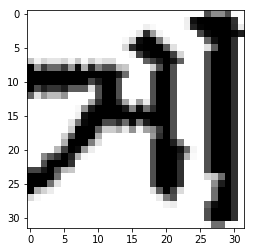

In [5]:
plt.imshow (img, cmap='gray')
plt.show ()

author                                                       no
class_gram                                                    0
class_type                                                  chi
class                                                      1848
code                                                          說
pos_x                                                       698
pos_y                                                       933
size                                                         47
confidence                                                 81.9
difference                                                 0.27
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 33000, dtype: object
(32, 32)


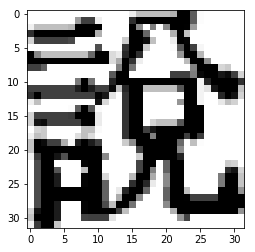

In [6]:
indx = 33000
print (df.iloc[indx])
img = cv_from_b64 (df['base64'][indx])
print (img.shape)
plt.imshow (img, cmap='gray')
plt.show()

In [7]:
img.shape, len(img.shape) == 2

((32, 32), True)

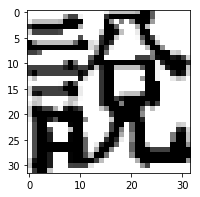

In [8]:
plt.figure(figsize=(3,3))
plt.imshow (img, cmap='gray', resample=False, interpolation=None)
plt.show()

In [9]:
from IPython.display import display, HTML

def imshow(name, imageArray):
     _, png = cv.imencode('.png', imageArray)
     encoded = base64.b64encode(png)
     return HTML(data='''<img alt="{0}" src="data:image/png;base64, {1}"/>'''.format(name, encoded.decode('ascii')))
#

In [10]:
imshow('image display', img)

In [11]:
a = df.iloc[3300]
print (a.code, a.code == '고')

고 True


In [12]:
df.head()

,author,class_gram,class_type,class,code,pos_x,pos_y,size,confidence,difference,base64
0,yi,0,num,1,0,148,1886,15,77.12,0.19,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1,yi,0,num,1,0,1194,1890,15,0.71,0.21,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
2,yi,0,num,1,0,1176,1889,15,0.83,0.22,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
3,yi,0,num,1,0,1180,1885,14,78.98,0.23,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
4,yi,0,num,1,0,104,1882,23,1.00,0.24,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...


In [13]:
rkdf = df.loc[df['code'] == '가']

In [14]:
print (rkdf.shape)
rkdf.head()

(617, 11)


,author,class_gram,class_type,class,code,pos_x,pos_y,size,confidence,difference,base64
1704,yi,1,kor,182,가,1049,593,31,86.48,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1705,yi,1,kor,182,가,615,616,30,0.87,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1706,yi,1,kor,182,가,313,721,34,78.80,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1707,yi,1,kor,182,가,823,591,35,75.60,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1708,yi,1,kor,182,가,731,492,34,74.90,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...


In [15]:
#[x for x in rkdf['base64']]
cv_from_b64 (rkdf['base64'].iloc[0])
imgs = []
for x in rkdf['base64']:
#    print (x)
    imgs.append (cv_from_b64(x))
#

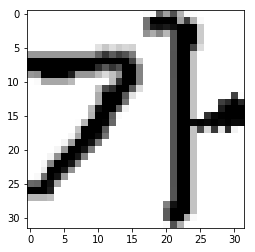

In [16]:
#rkdf['base64'].iloc[0]
plt.imshow (imgs[20], cmap='gray')

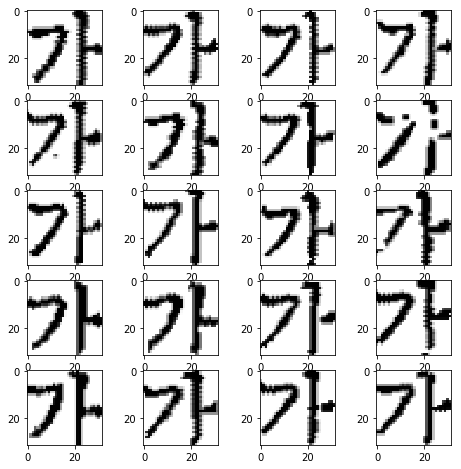

In [17]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = imgs[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [18]:
# create a new column named 'images'
rkdf = rkdf.assign (images = imgs) 

In [19]:
rkdf.columns

Index(['author', 'class_gram', 'class_type', 'class', 'code', 'pos_x', 'pos_y',
       'size', 'confidence', 'difference', 'base64', 'images'],
      dtype='object')

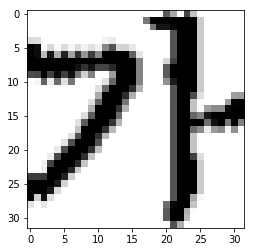

In [20]:
plt.imshow (rkdf['images'].iloc[110], cmap='gray')

In [21]:
rkdf.shape

(617, 12)

In [22]:
dstack = []
for i in range (rkdf['images'].shape[0]):
    dstack.append (rkdf['images'].iloc[i].reshape(-1))
rkdata = np.vstack (dstack)
rkdata.shape

(617, 1024)

In [23]:
a = rkdf['images'].iloc[0].reshape(-1)
a.shape
s = np.vstack ((a,a))
print (s, s.shape)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]] (2, 1024)


In [26]:
import r_pca
# use R_pca to estimate the degraded data as L + S, where L is low rank, and S is sparse
rpca = r_pca.R_pca(rkdata)
L, S = rpca.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 945719.9190519253
iteration: 100, error: 265.5579626127955
iteration: 200, error: 21.502068280520163
iteration: 300, error: 3.722682451522931
iteration: 395, error: 1.0641938363729537


In [ ]:
uL,dL,vL = np.linalg.svd (L)
print (dL.shape, dL[:100])
plt.plot (range(dL.shape[0]), dL)

In [ ]:
np.max ( np.abs(S) )

In [ ]:
u,d,v = np.linalg.svd (rkdata)
print (d.shape, d[:10])
plt.plot (range(d.shape[0]), d), plt.plot (dL, d)

In [ ]:
d = np.abs( rkdata[0] - rkdata[1] ).reshape(32,32)
plt.imshow (d, cmap='gray')

In [ ]:
m = cv.merge ((255-rkdf['images'].iloc[0], 255-rkdf['images'].iloc[1], 255-rkdf['images'].iloc[2]))

In [ ]:
plt.imshow (m)

In [ ]:
mean_img = np.median (rkdata, axis=0) # np.mean (rkdata, axis=0)
plt.imshow (mean_img.reshape(32,32), cmap='gray')

std_img =  np.sqrt (  np.sum ((rkdata - mean_img) * (rkdata - mean_img), axis=0) / rkdata.shape[0] ) # to be fixed.
print (std_img.shape, std_img)
#std_img =  np.std (rkdata, axis=0)

In [ ]:
def dist (x, m, s):
    d = 0
    for i in range(s.shape[0]):
        if s[i] != 0.0:
            d += np.abs(x[i] - m[i])/s[i]
    return d

dists = [dist(x, mean_img, std_img) for x in rkdata]

#plt.plot (dists)
h=plt.hist (dists, bins=100)

In [ ]:
imax = np.argmax (dists)
print ('@ argmax(dists) = ', imax)
print ('@ stats(dists) = ', np.mean(dists), np.std(dists), dists[imax], (dists[imax]-np.mean(dists))/np.std(dists))

plt.subplot (131)
plt.imshow (rkdata[imax].reshape(32,32), cmap='gray')
plt.subplot (132)
plt.imshow (rkdata[imax-1].reshape(32,32), cmap='gray')
plt.subplot (133)
plt.imshow (rkdata[imax+1].reshape(32,32), cmap='gray')

In [ ]:
asort = np.argsort (dists)[::-1]
print (asort[:10])
for i in asort[:10]:
    print ('index = %3d  m_dist = %.1f   dist normalized = %5.1f' %
           (i, dist(rkdata[i], mean_img, std_img), (dists[i]-np.mean(dists))/np.std(dists)))

plt.subplot (141)
plt.imshow (rkdata[asort[0]].reshape(32,32), cmap='gray')
plt.subplot (142)
plt.imshow (rkdata[asort[1]].reshape(32,32), cmap='gray')
plt.subplot (143)
plt.imshow (rkdata[asort[2]].reshape(32,32), cmap='gray')
plt.subplot (144)
plt.imshow (rkdata[asort[3]].reshape(32,32), cmap='gray')

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
fig.add_subplot(rows,columns,1)
plt.imshow (mean_img.reshape(32,32), cmap='gray')
for i in range(columns*rows-1):
    img = rkdata[asort[i]].reshape(32,32)
    fig.add_subplot(rows, columns, i+2)
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
var_img = np.var (rkdata, axis=0)
print ('var=', var_img)
std_img = np.std (rkdata, axis=0)
print (np.max(std_img), std_img)
plt.imshow (std_img.reshape(32,32).astype(np.uint8), cmap='gray')

In [ ]:
def cov (data): # sample covariance
    m = np.mean (data).astype(np.float64)
    c = np.zeros ( (data.shape[1], data.shape[1]), dtype=np.float64)
    for i in range (data.shape[0]):
        d = data[i] - m
        c += np.outer (d, d)
    #
    c /= data.shape[0]
    return c
#
cov = cov (rkdata)
cov.shape

In [ ]:
#np.linalg.eig (cov)
#print (covInv - covInv.transpose())
cov_rank = np.linalg.matrix_rank (cov)
print ('@ cov rank = ', cov_rank)
u,d,v = np.linalg.svd (cov)
print ('d = ', d)
d2 = d.copy()
for i in range(d2.shape[0]):
    if i < cov_rank:
        d2[i] = 1/d2[i]
    else:
        d2[i] = 0.
#d2[cov_rank:] = 0
print ('d2 = ', d2)
icov = np.matmul( np.matmul(v, np.diag(d2)), u.transpose() )
np.matmul(cov, icov)

In [ ]:
print ('cov rank =  %d out of %d' % (np.linalg.matrix_rank (cov), cov.shape[0]))
d = rkdata[100] - mean_img
print ('max abs d = ', np.max(np.abs(d)))
# plt.imshow (np.abs(d.reshape(32,32)), cmap='gray')

a = icov.dot (d)
print ('mdist = ', np.sqrt(a.dot(d)))

def mah_dist (x, use_var=False):
    d = x - mean_img
    if use_var:
        ad = d
        for i in range (var_img.shape[0]):
            if np.abs(var_img[i]) > 1e-7:
                ad[i] /= var_img[i]
    else:
        ad = icov.dot (d)
    val = ad.dot(d)
    if val < 0:
        print ('!! negative val: ', val)
    return np.sqrt (ad.dot(d) / d.shape[0]) 

mdist = [ mah_dist(rkdata[i], use_var=False) for i in range(rkdata.shape[0])]

print (max(mdist), min(mdist), ' ', np.mean(mdist), np.std(mdist))
plt.plot (mdist)

In [ ]:
indx = 3000
print (df.iloc[indx,:])
img0 = cv_from_b64 (df['base64'].iloc[indx])

print ('covInv max = ', np.max (cov - cov.transpose()))

dif = img0.reshape(-1) - mean_img
d = dif.dot(covInv.dot(dif))
print (d, dif)
#print ('@ dist = ', mah_dist (img0.reshape(-1), use_var=False))
plt.imshow (img0)

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(rkdata)
X = pca.transform(rkdata)

In [ ]:
X

In [ ]:

# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = rkdata[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
